# Modern Portfolio Theory

## Introduction

In 1952 Harry Markowitz introduced the concept of portfolio theory. The problem that the theory is supposed to solve is the following: given two assets and a required rate of return, construct a portfolio with minimum risk.

I like to think of the solution that the theory proposes as a mix of statistics and microeconomics. We use statistics to estimate risk and return characteristics of all possible portfolios and microeconomics to make the final choice.

## Statistical part of MPT

From the point of view of statistics, MPT is based on concepts of standard deviation and expected return. Let's say that we need to form a portfolio from two assets, Gazprom stock (GAZP) and Yandex stock (YNDX). Then we would combine them in our portfolio in some ratio. For example, if I have 10,000 RUB, I could invest 5,000 into GAZP and 5,000 into YNDX. In this case, we say that the *weights* of these two stocks in my portfolio would both be $0.5$. So, in general, we understand weights of the assets as $w_1 = \frac{I_1}{P}$ and $w_2 = \frac{I_2}{P}$ where $w_1, w_2$ are weights of asset 1 and asset 2, $I_1, I_2$ are the sums invested into asset 1 and asset 2 and $P$ is the total sum of money invested into our portfolio.

### The concept of expected return
If we know the weights of the assets in our portfolio, then we can estimate expected return of this portfolio. For that let's continue our example of Yandex and Gazprom.

Firstly, let's understand how to combine returns of assets to achieve portfolio return. If the value of GAZP increased 2% this month and the value of YNDX increased 1% this month, then the return of the portfolio is $2% \cdot w_{GAZP} + 1% \cdot w_{YNDX}$, so in our case where $w_{GAZP} = w_{YNDX} = 0.5$ we have $2 \% \cdot 0.5 + 1 \% \cdot 0.5 = 1 \% + 0.5 \% = 1.5 \%$.

Secondly, let's understand the concept of expected return. Now, if you have ever read any investment fund reports (or have ever opened my telegram account), you have probably heard of the phrase "Past performance is not indicative of future returns". This phrase is essentially legal-speak just to avoid getting sued. In fact, past performance is pretty much the only thing we have to estimate our future returns. If GAZP has been growing by 1% each month over the past two years, then it is very reasonable of us to assume that this month it is also going to grow by 1%. Mathematically speaking, this is called an expected return. We take the mean value of all the returns on our asset and say that, quite likely, this is going to be the return on this asset in the next period. So, for any asset, its expected return is defined as $E[R] = \sum_{i = 1}^n{R_i \cdot P_i}$, where $R_i$ is asset return in period $i$ and $P_i$ is the probability is this return. When working with historical data, we usually say that $P_i = \frac{1}{N}$, where $N$ is the number of periods.

### The concept of variance and standard deviation
Essentially, variance is a measure of how much our returns *vary* or change across time. On the bottom you can see two charts. The green chart shows a random variable with variance of $\sigma_1^2 = 0.05^2 = 0.0025$ and the red chart shows a random variable with variance of $\sigma_2^2 = 0.1^2 = 0.01$. As you see, the red one is more squished to the bottom. That is because it varies much more than the first one.

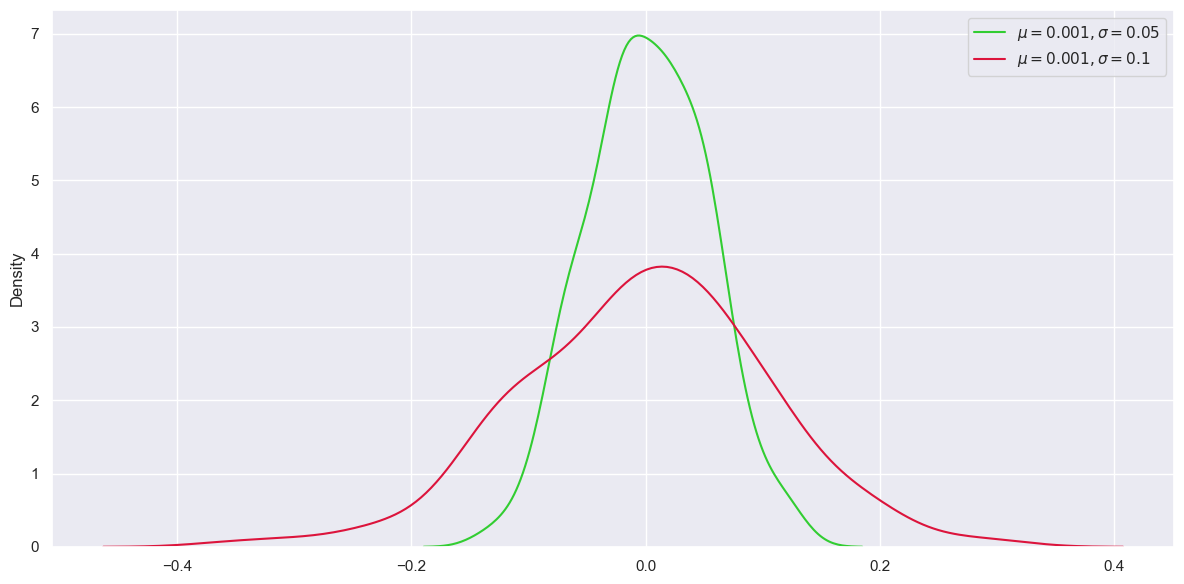

In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from numpy.random import normal
import seaborn as sns
import matplotlib.pyplot as plt


mu1 = mu2 = 0.001
sigma1 = 0.05
sigma2 = 0.1

dist1 = normal(mu1, sigma1, 250)
dist2 = normal(mu2, sigma2, 250)

fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=dist1, color='limegreen', label='$\mu = 0.001, \sigma = 0.05$', ax=ax)
sns.kdeplot(data=dist2, color='crimson', label='$\mu = 0.001, \sigma = 0.1$', ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

On a real asset price data large variance would be seen as large oscilations of the asset price. Smaller variance — smaller oscillations. Orange line represents a higher variance stock and blue line — smaller variance.

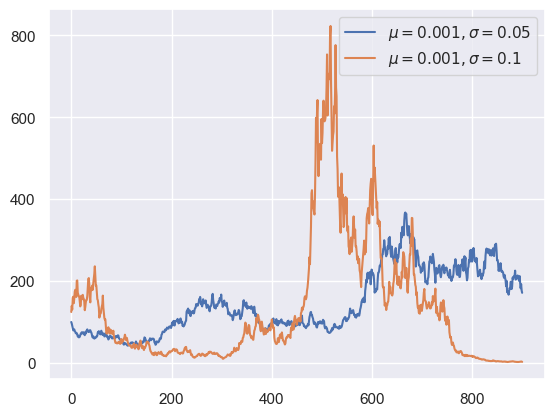

In [54]:
import random 
import numpy as np

def simulate_1d_gbm(mu, sigma, nsteps = 900, t = 1):
    steps = [ (mu - (sigma**2) / 2) + np.random.randn() * sigma for i in range(nsteps)]
    y = 100 * np.exp(np.cumsum(steps))
    x = [t * i for i in range(nsteps)]
    return x, y

sim1 = simulate_1d_gbm(mu1, sigma1)
sim2 = simulate_1d_gbm(mu2, sigma2)

sns.set_theme(style="darkgrid")

sns.lineplot(x = sim1[0], y = sim1[1], label='$\mu = 0.001, \sigma = 0.05$')
sns.lineplot(x = sim2[0], y = sim2[1], label='$\mu = 0.001, \sigma = 0.1$')
plt.show()

### Covariance of two asset returns
Unfortunately though, we cannot just take the weighted average variance to estimate portfolio variance, as we did with the expected return. That is because if two assets move in tandem, then their oscillations will be higher, and if they move in the opposite directions, then their oscillations will be smaller. Let's look at two examples to better understand the problem.

#### Positively correlated assets
If two assets are positively correlated, then when one of them goes down, the other is quite likely to go down as well. In this case, the drop in value of the portfolio will be higher than just the weighted average drop. For example, if GAZP and YNDX both go down 10%, then our 50/50 portfolio will go down by 10% too (GAZP: 5,000 -> 4,500; YNDX: 5,000 -> 4,500; Portfolio: 10,000 -> 9,000 = 10%). In total we lost 1,000 RUB. However, the weighted average of these two downs was just -500 * 0.5 -500 * 0.5 = -500. We lost more than the weighted average!

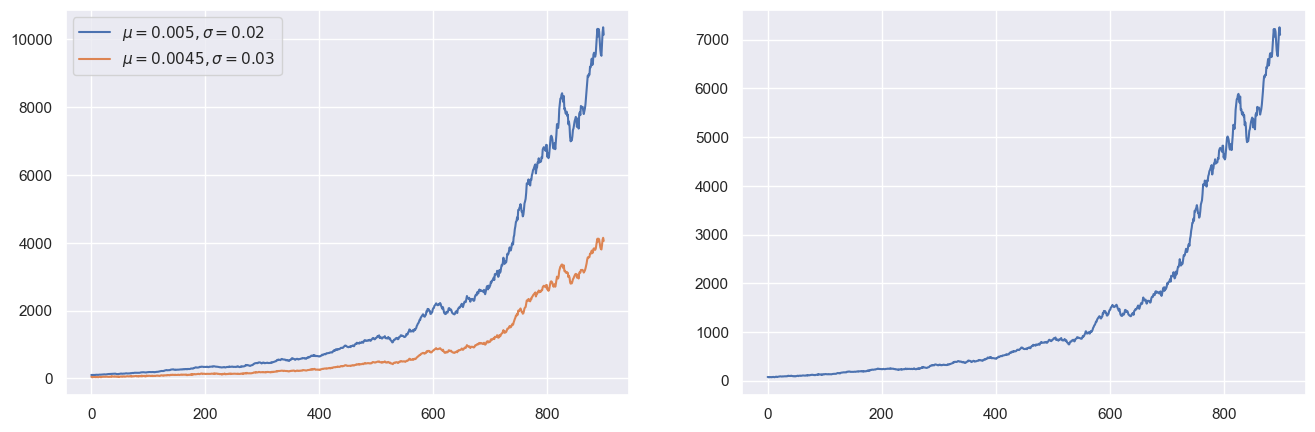

mu1 =  2094.127 mu2 =  837.72
0.5 * mu1 + 0.5 * mu2 =  1465.923
mu_total =  1465.923

sigma1 =  2610.581 sigma2 =  1044.031
0.5^2 * sigma1^2 + 0.5^2 * sigma2^2 =  1976284.234
sigma_total^2 =  3339033.046 So portfolio variance is much higher than the weighted average variance
correlation coefficient is  0.9999885210926636


In [172]:
sim1 = simulate_1d_gbm(mu = 0.005, sigma = 0.02)

sim2 = (sim1[0], np.multiply(sim1[1], 0.4) + 5 * np.random.randn(len(sim1[1])))

sim_total = np.multiply(sim1, 0.5) + np.multiply(sim2, 0.5)

fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.lineplot(x = sim1[0], y = sim1[1], label='$\mu = 0.005, \sigma = 0.02$', ax=ax[0])
sns.lineplot(x = sim2[0], y = sim2[1], label='$\mu = 0.0045, \sigma = 0.03$', ax=ax[0])
sns.lineplot(x = sim_total[0], y = sim_total[1], ax=ax[1])
plt.show()

print("mu1 = ", round(np.mean(sim1[1]), 3), "mu2 = ", round(np.mean(sim2[1]), 3))
print("0.5 * mu1 + 0.5 * mu2 = ", round(0.5 * np.mean(sim1[1]) + 0.5 * np.mean(sim2[1]), 3))
print("mu_total = ", round(np.mean(sim_total[1]), 3))

print()

print("sigma1 = ", round(np.std(sim1[1]), 3), "sigma2 = ", round(np.std(sim2[1]), 3))
print("0.5^2 * sigma1^2 + 0.5^2 * sigma2^2 = ", round(0.5**2 * np.std(sim1[1])**2 + 0.5**2 * np.std(sim2[1])**2, 3))
print("sigma_total^2 = ", round(np.std(sim_total[1])**2, 3), "So portfolio variance is much higher than the weighted average variance")

print("correlation coefficient is ", np.corrcoef(sim1[1], sim2[1])[0][1])

#### Negatively correlated assets
If our assets are negatively correlated, then we have a completely different picture. When one drops, the other rises — and vice versa. This means that our variance is actually smaller, than the weighted average.

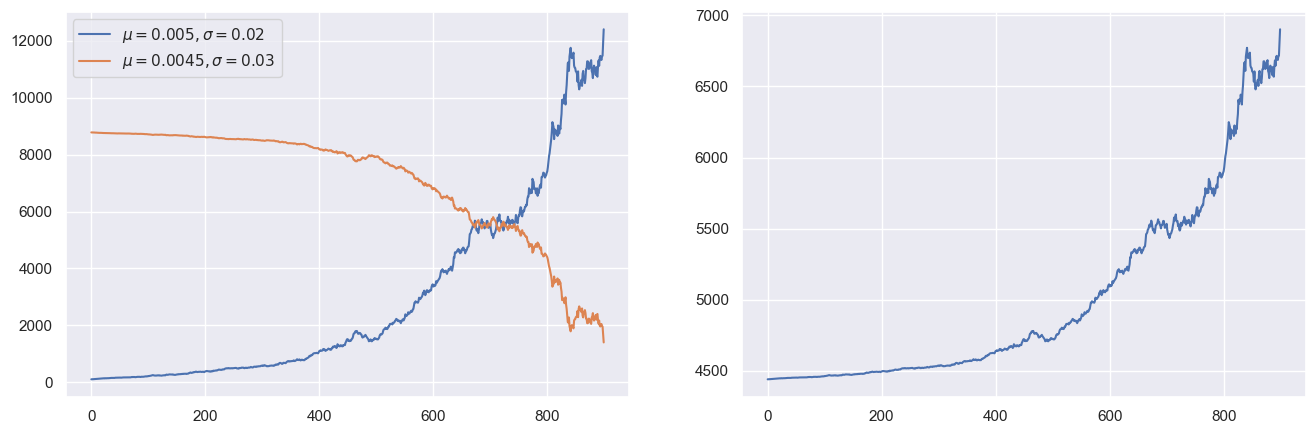

mu1 =  2947.1 mu2 =  7073.04
0.5 * mu1 + 0.5 * mu2 =  5010.07
mu_total =  5010.07

sigma1 =  3309.323 sigma2 =  1985.594
0.5^2 * sigma1^2 + 0.5^2 * sigma2^2 =  3723549.404
sigma_total^2 =  438064.636 So portfolio variance is smaller than the weighted average variance
correlation coefficient is  -0.9999999999999998


In [161]:
sim1 = simulate_1d_gbm(mu = 0.005, sigma = 0.02)

sim2 = (sim1[0], np.multiply(sim1[1], -0.6) + 3 * np.mean(sim1[1]))

sim_total = np.multiply(sim1, 0.5) + np.multiply(sim2, 0.5)

fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.lineplot(x = sim1[0], y = sim1[1], label='$\mu = 0.005, \sigma = 0.02$', ax=ax[0])
sns.lineplot(x = sim2[0], y = sim2[1], label='$\mu = 0.0045, \sigma = 0.03$', ax=ax[0])
sns.lineplot(x = sim_total[0], y = sim_total[1], ax=ax[1])
plt.show()

print("mu1 = ", round(np.mean(sim1[1]), 3), "mu2 = ", round(np.mean(sim2[1]), 3))
print("0.5 * mu1 + 0.5 * mu2 = ", round(0.5 * np.mean(sim1[1]) + 0.5 * np.mean(sim2[1]), 3))
print("mu_total = ", round(np.mean(sim_total[1]), 3))

print()

print("sigma1 = ", round(np.std(sim1[1]), 3), "sigma2 = ", round(np.std(sim2[1]), 3))
print("0.5^2 * sigma1^2 + 0.5^2 * sigma2^2 = ", round(0.5**2 * np.std(sim1[1])**2 + 0.5**2 * np.std(sim2[1])**2, 3))
print("sigma_total^2 = ", round(np.std(sim_total[1])**2, 3), "So portfolio variance is smaller than the weighted average variance")

print("correlation coefficient is ", np.corrcoef(sim1[1], sim2[1])[0][1])